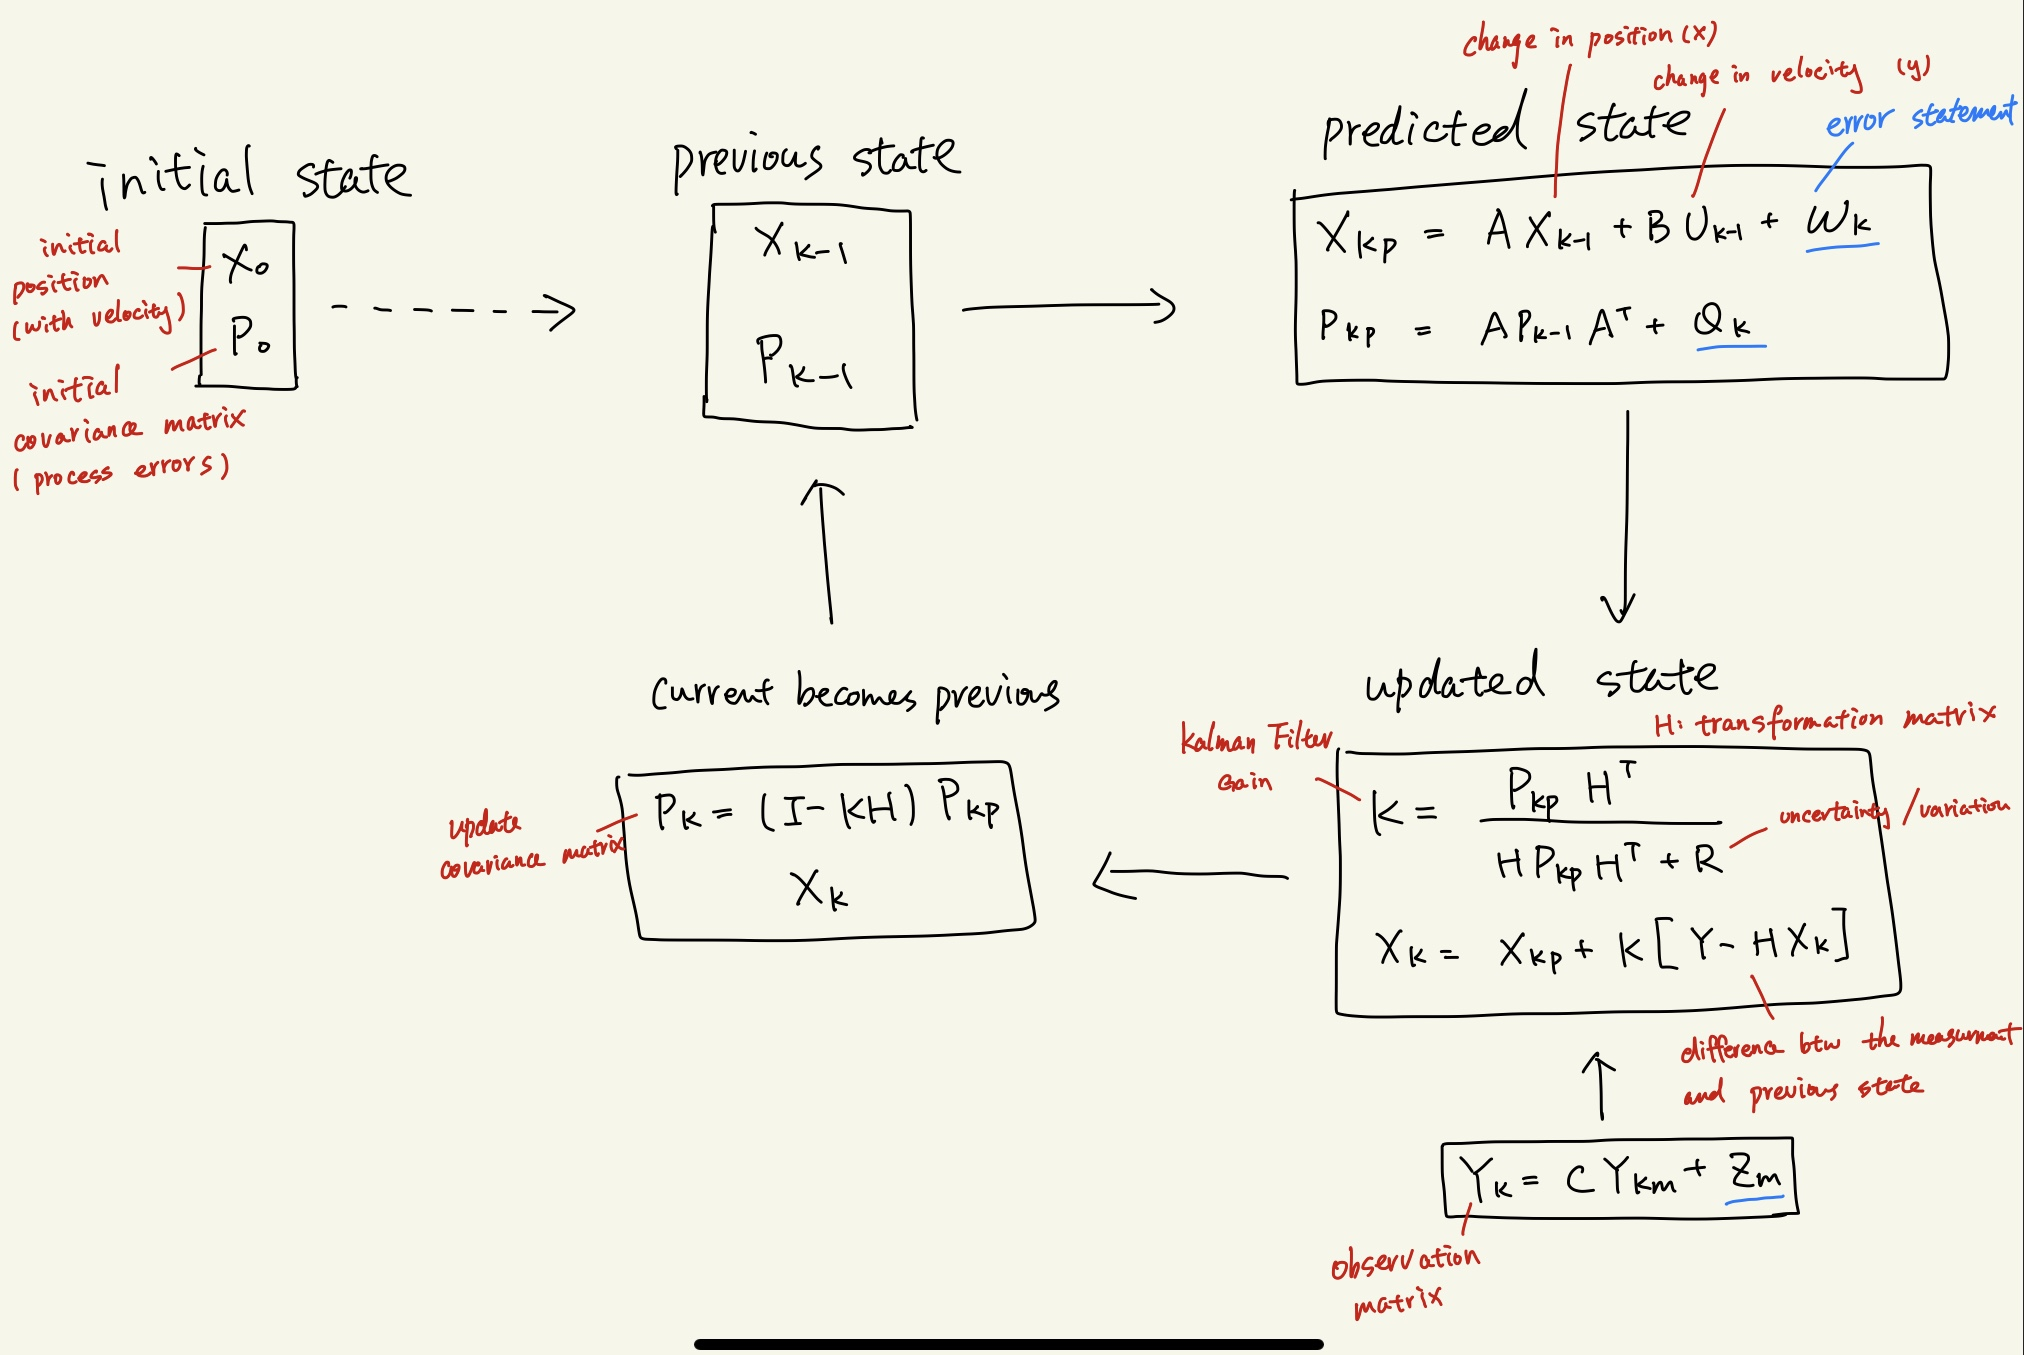

In [145]:
from IPython.display import Image
Image(filename = "1-1.jpeg", width=900, height=800)

In [ ]:
# Predict Step

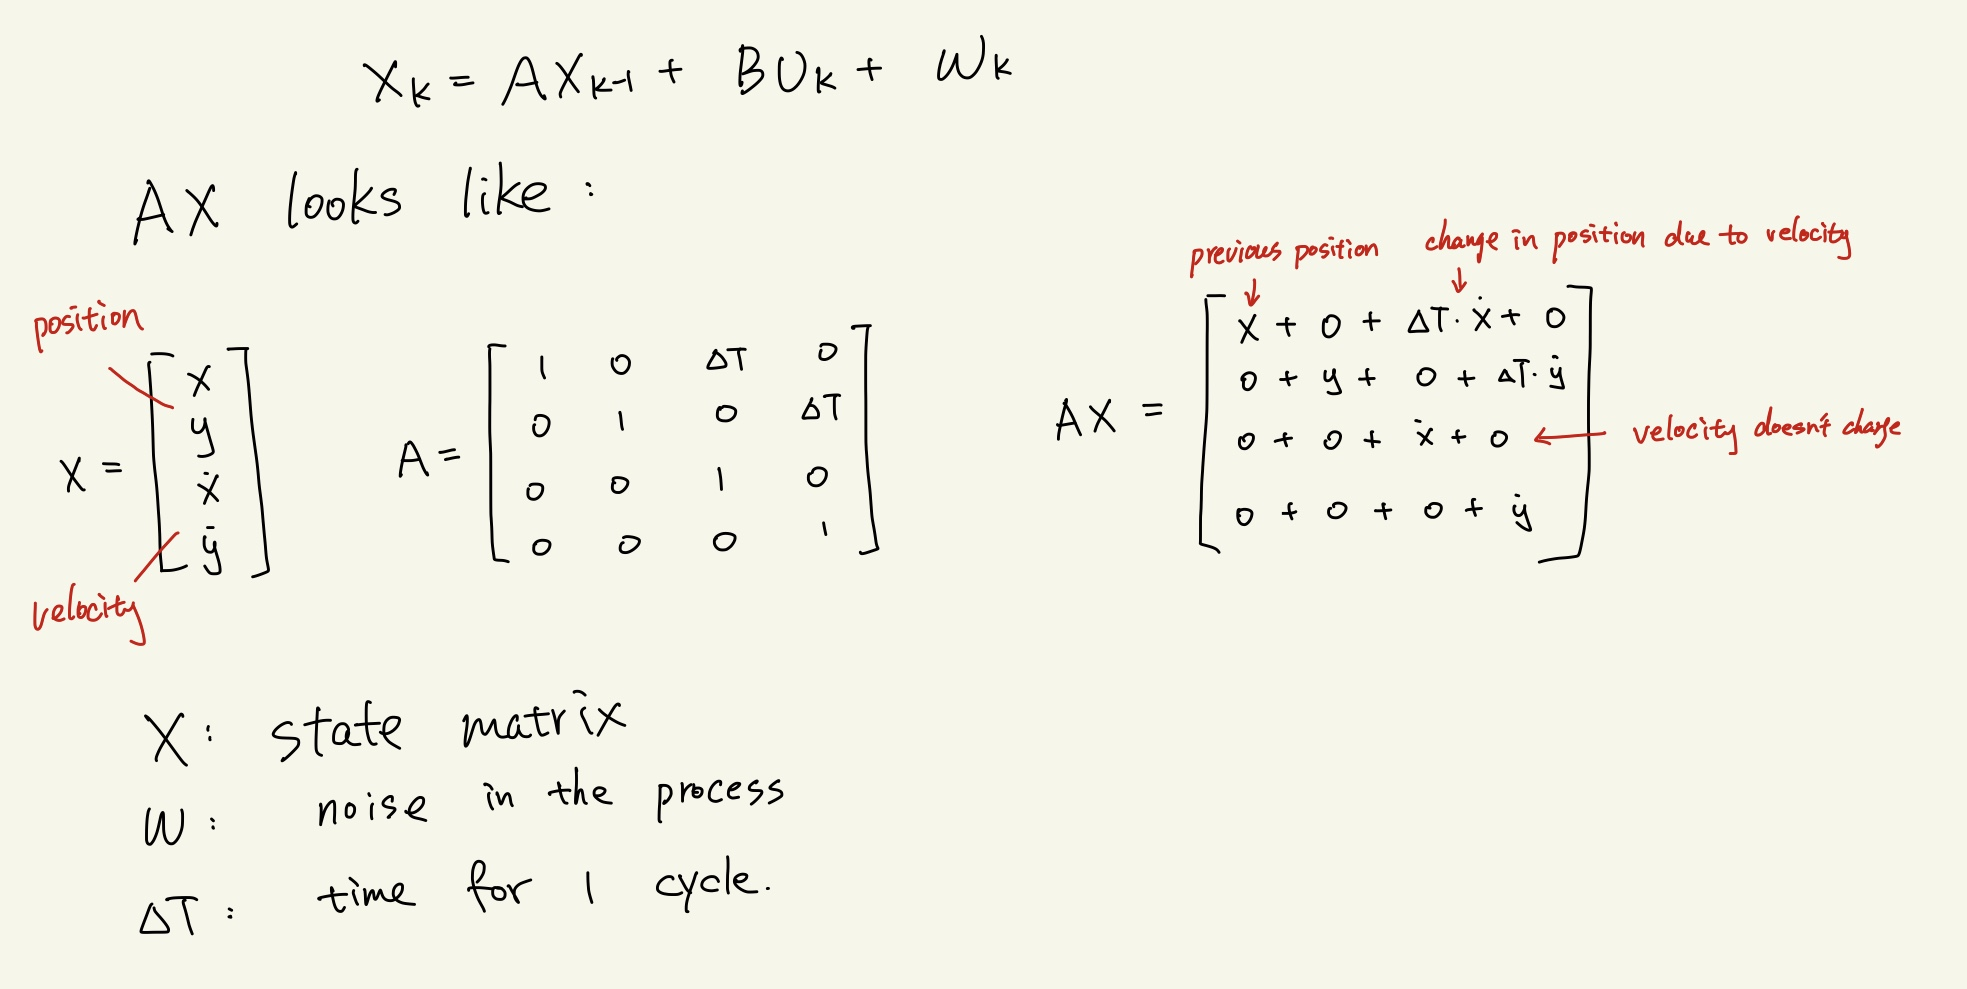

In [166]:
from IPython.display import Image
Image(filename = "1-2.jpeg", width=800, height=600)

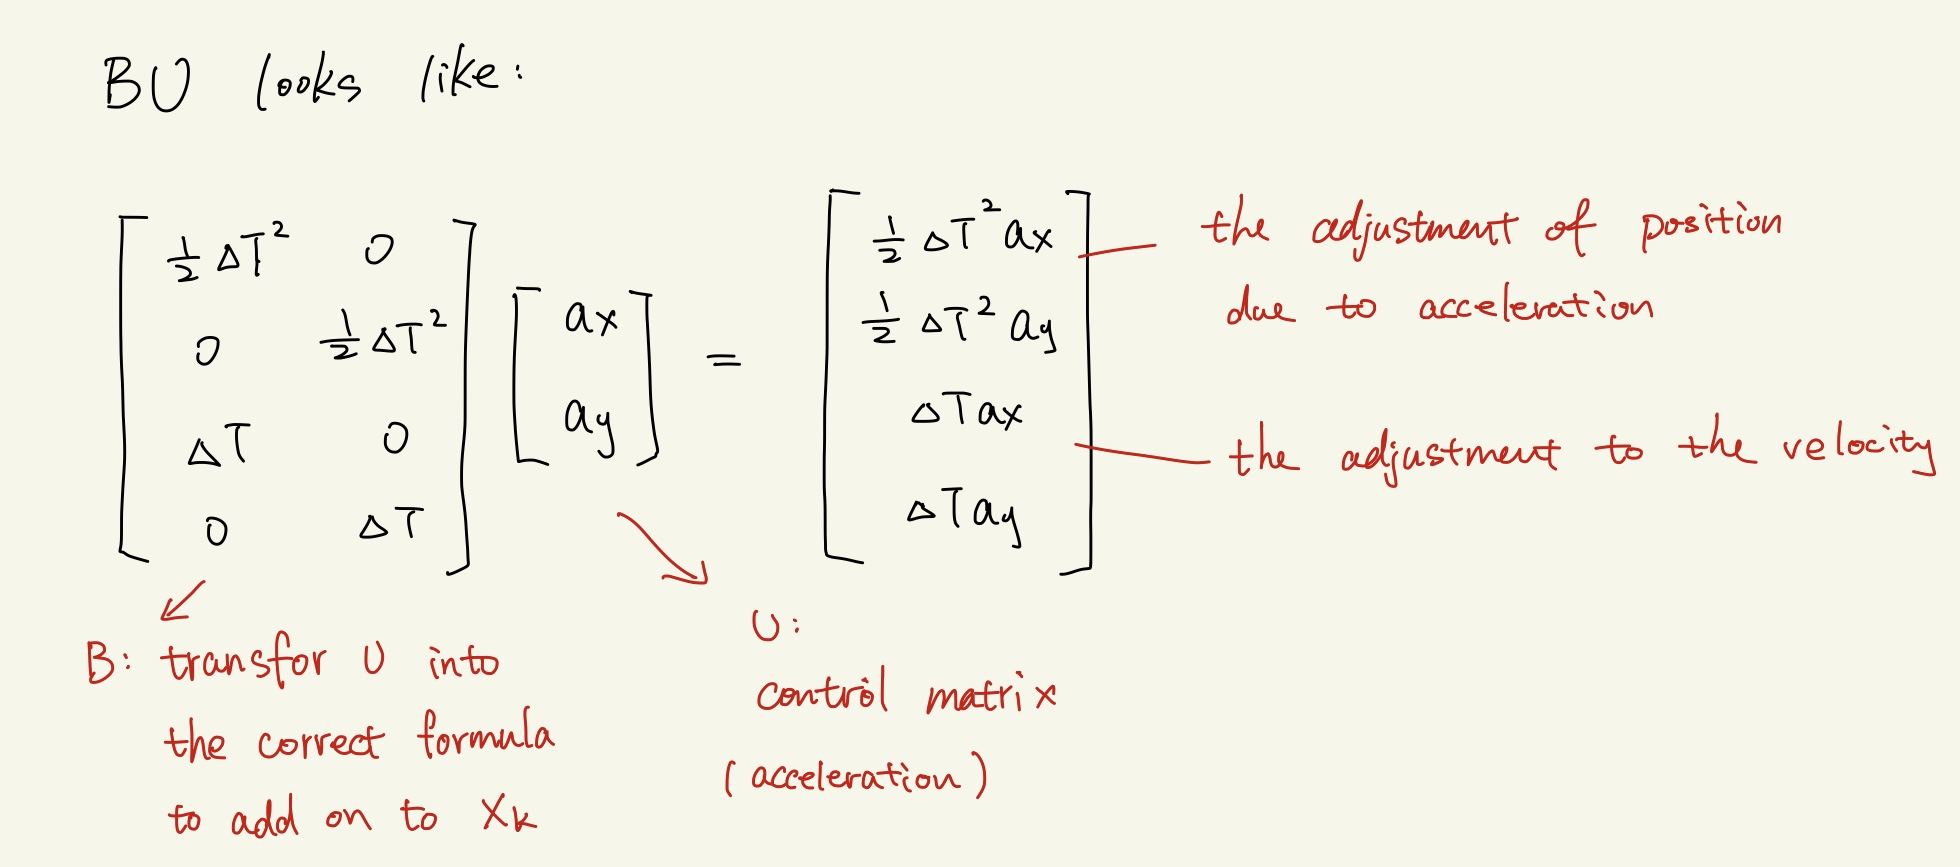

In [130]:
from IPython.display import Image
Image(filename = "1-3.jpeg", width=800, height=600)

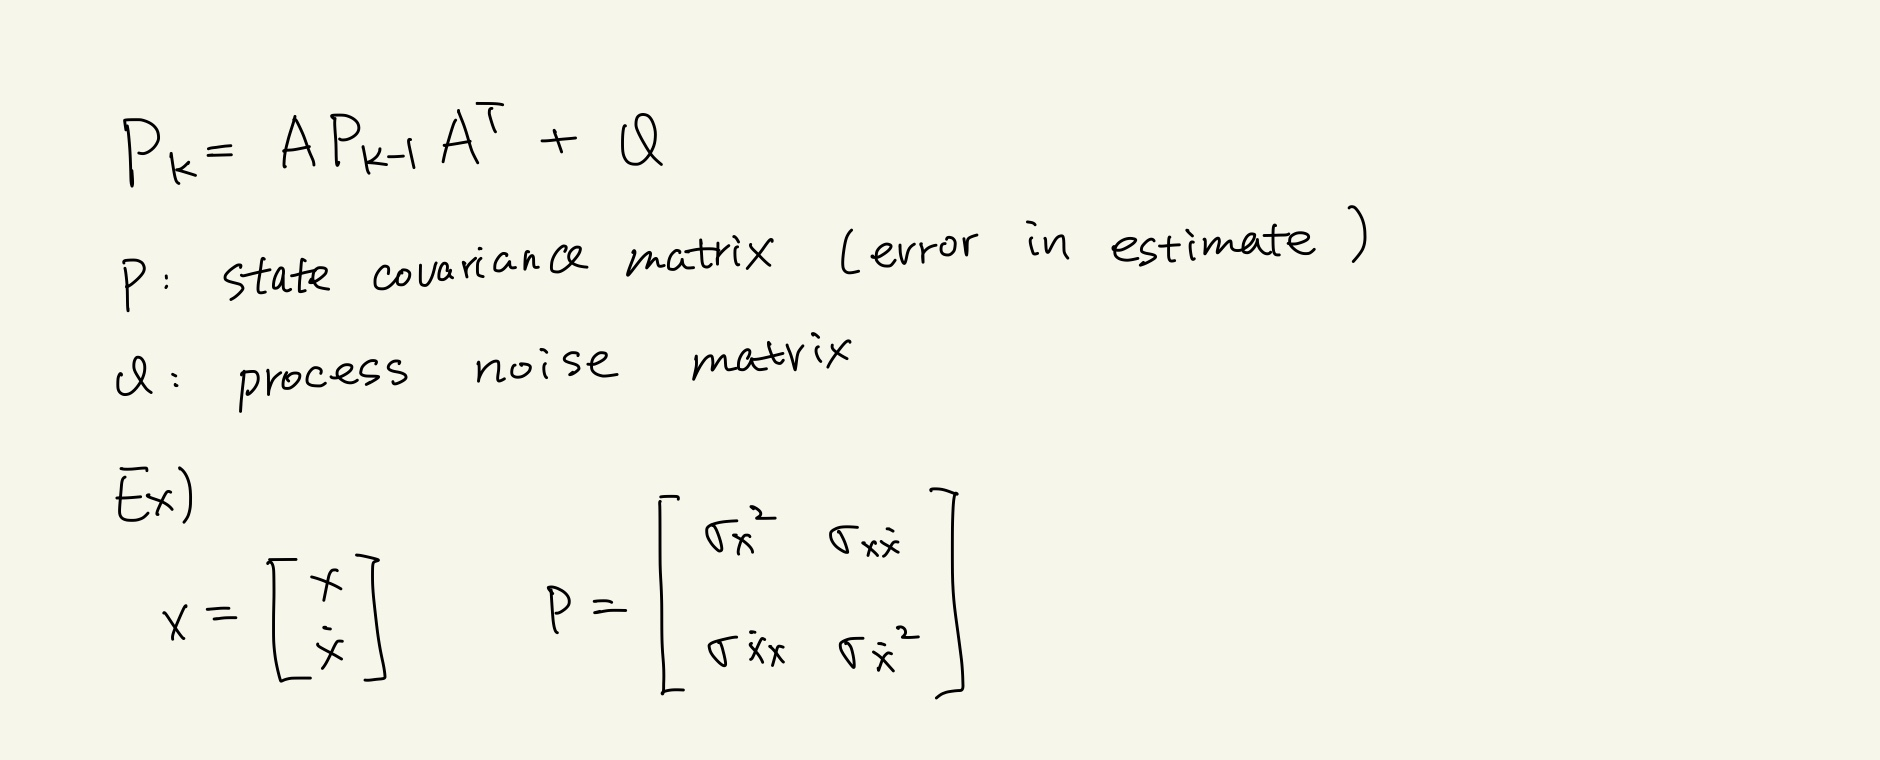

In [131]:
from IPython.display import Image
Image(filename = "1-4.jpeg", width=800, height=600)

In [ ]:
# Code for Predict Step

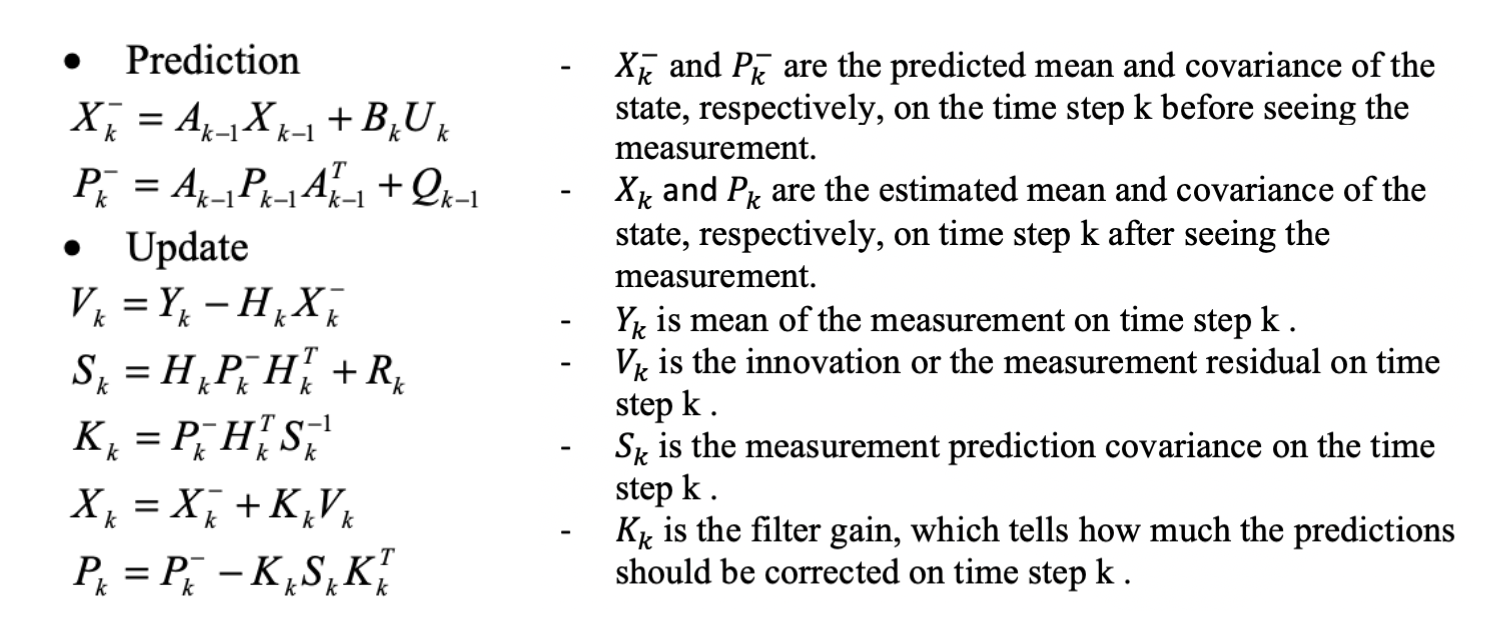

In [122]:
from IPython.display import Image
Image(filename = "one.png", width=600, height=600)

In [178]:
def kf_predict(X, P, A, Q, B, U):
    X = dot(A,X) + dot(B, U)
    P = dot(A, dot(P, A.T)) + Q
    return (X,P)

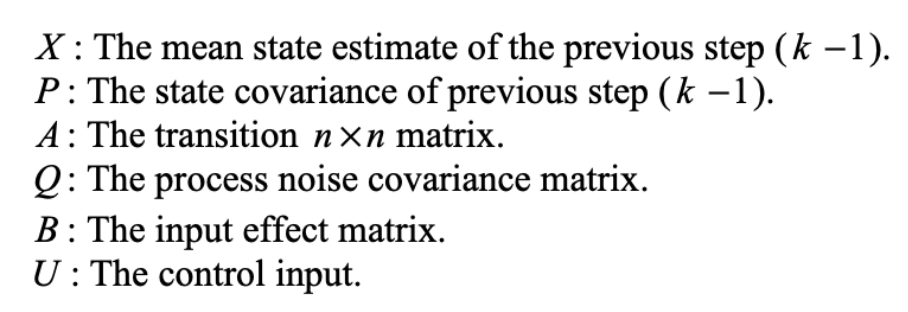

In [132]:
from IPython.display import Image
Image(filename = "two.png", width=400, height=200)

In [ ]:
# Update Step

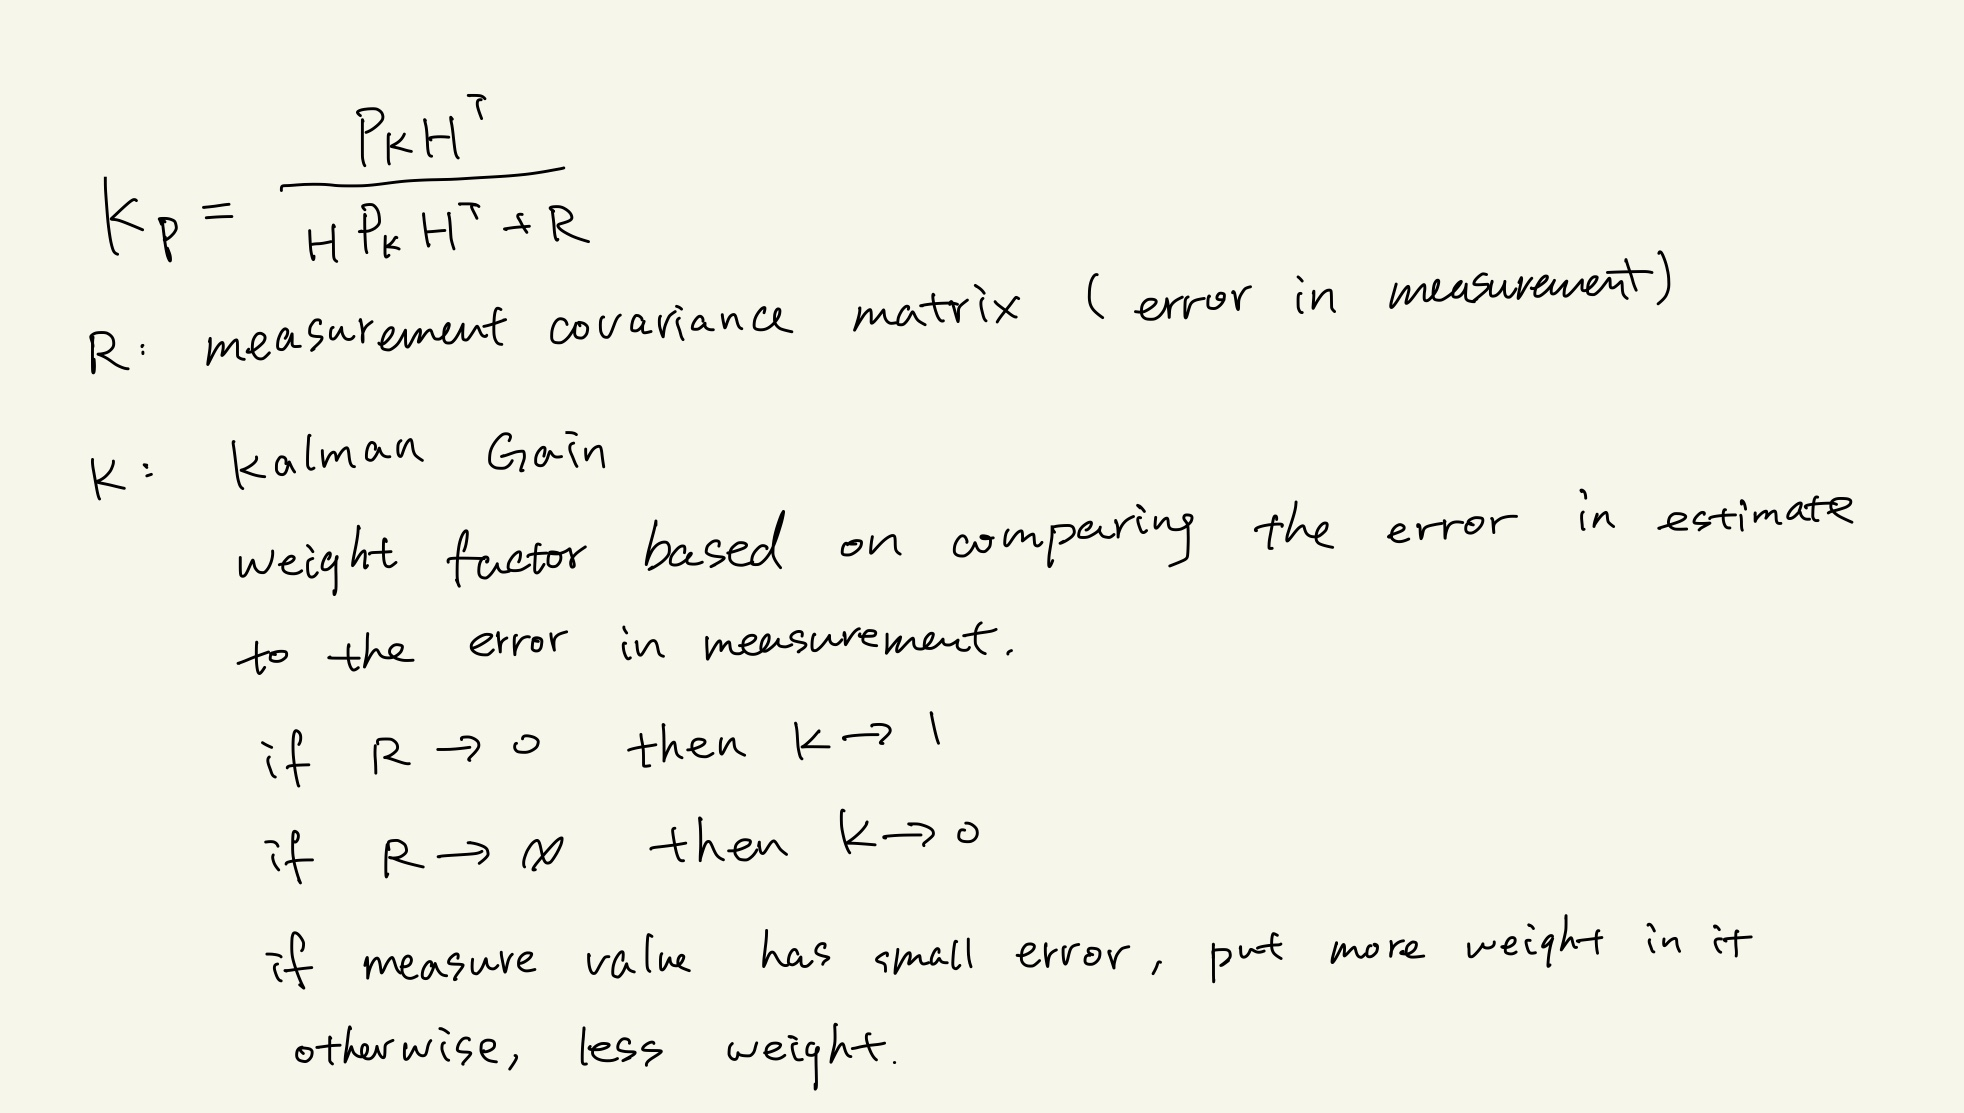

In [133]:
from IPython.display import Image
Image(filename = "1-5.jpeg", width=800, height=600)

In [ ]:
#Code for Update Step

In [3]:
from numpy import dot, sum, tile, linalg
from numpy.linalg import inv 

In [179]:
def kf_update(X, P, Y, H, R):
    result = ()
    IM = dot(H, X)
    #numerator
    IS = R + dot(H, dot(P, H.T))
    #denominator
    K = dot(P, dot(H.T, inv(IS)))
    #Kalman Gain
    X = X + dot(K, (Y-IM))
    #Updated X
    P = P - dot(K, dot(IS, K.T))
    #Updated P
    LH = gauss_pdf(Y, IM, IS)
    return (X,P,K,IM,IS,LH)

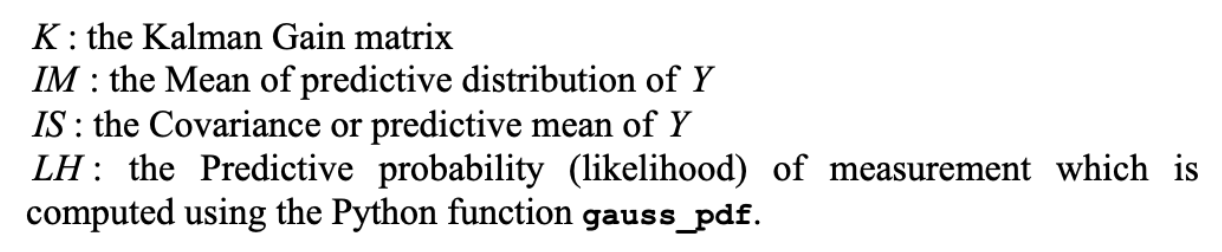

In [135]:
from IPython.display import Image
Image(filename = "three.png", width=600, height=400)

In [180]:
def gauss_pdf(X, M, S):
    if M.shape[1] == 1:
        DX = X - tile(M, X.shape[1])
        E = 0.5 * sum(DX * (dot(inv(S), DX)), axis=0)
        E = E + 0.5 * M.shape[0] * log(2 * pi) + 0.5 * log(np.linalg.det(S))
        P = exp(-E)
    elif X.shape[1] == 1:
        DX = tile(X, M.shape[1])- M
        E = 0.5 * sum(DX * (dot(inv(S), DX)), axis=0)
        E = E + 0.5 * M.shape[0] * log(2 * pi) + 0.5 * log(np.linalg.det(S))
        P = exp(-E)
    else:
        DX = X-M
        E = 0.5 * dot(DX.T, dot(inv(S), DX))
        E = E + 0.5 * M.shape[0] * log(2 * pi) + 0.5 * log(np.linalg.det(S))
        P = exp(-E)
    return (P[0],E[0]) 

In [ ]:
# Example: tracking of mobile in wireless network

In [8]:
from numpy import *
from numpy.linalg import inv

In [12]:
import numpy as np

In [9]:
#time step of mobile movement
dt = 0.1 

In [181]:
# Initialization of state matrices
X = array([[0.0], [0.0], [0.1], [0.1]])
P = diag((0.01, 0.01, 0.01, 0.01))
A = array([[1, 0, dt , 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0, 1]])
Q = eye(X.shape[0])*2
B = eye(X.shape[0])
U = zeros((X.shape[0],1))

In [182]:
# Measurement matrices
Y = array([[X[0,0] + abs(np.random.randn(1)[0])], [X[1,0] + abs(np.random.randn(1)[0])]])
#The matrix of measurement Y describes the estimated position of the mobile using a
#trilateration algorithm based on a least square estimation and the knowledge of at
#least three values of Time of Arrival (ToA) at time step k . These values are
#computed using ranging procedures between the mobile and the three antennas.
#Measurement/Observation Matrix
H = array([[1, 0, 0, 0], [0, 1, 0, 0]])
R = eye(Y.shape[0]) 

In [183]:
# Number of iterations in Kalman Filter
N_iter = 10 

In [87]:
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')
import numpy as np

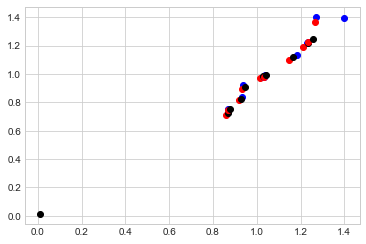

In [184]:
# Applying the Kalman Filter
for i in arange(0, N_iter):
    (X, P) = kf_predict(X, P, A, Q, B, U)
    plt.plot(X[0,0], X[1,0], 'o', color='black')
    #This is the predict value
    
    (X, P, K, IM, IS, LH) = kf_update(X, P, Y, H, R)
    plt.plot(X[0,0], X[1,0], 'o', color='red')
    #This is the updated Kalman Filter value
    
    Y = array([[X[0,0] + abs(0.1 * np.random.randn(1)[0])],[X[1, 0] + abs(0.1 * np.random.randn(1)[0])]]) 
    plt.plot(Y[0,0], Y[1,0], 'o', color='blue')
    #This is the Measured Value